In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data.head()

,Fever,Body_pain,age,runny_nose,diff_breath,infection_prob
0,102.991,1,34,1,0,1
1,102.721,1,50,0,1,0
2,100.595,0,39,0,-1,0
3,98.470,1,14,1,0,0
4,100.603,0,90,0,-1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
Fever             2500 non-null float64
Body_pain         2500 non-null int64
age               2500 non-null int64
runny_nose        2500 non-null int64
diff_breath       2500 non-null int64
infection_prob    2500 non-null int64
dtypes: float64(1), int64(5)
memory usage: 117.3 KB


In [5]:
data.memory_usage(deep=True)

Index               128
Fever             20000
Body_pain         20000
age               20000
runny_nose        20000
diff_breath       20000
infection_prob    20000
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7748525a10>,
      dtype=object)

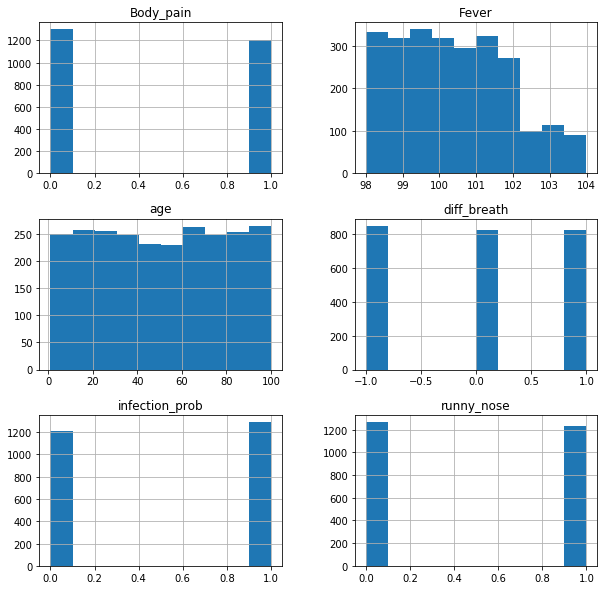

In [6]:
data.hist(figsize=(10,10))

In [7]:
cor_mat=data.corr()

In [8]:
cor_mat.infection_prob.sort_values(ascending=False)

infection_prob    1.000000
Body_pain         0.020572
diff_breath       0.011625
age               0.003269
runny_nose       -0.007521
Fever            -0.054510
Name: infection_prob, dtype: float64

In [9]:
data[data.Fever>100].infection_prob.sum()

697

In [10]:
data.shape

(2500, 6)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7747da1990>,
      dtype=object)

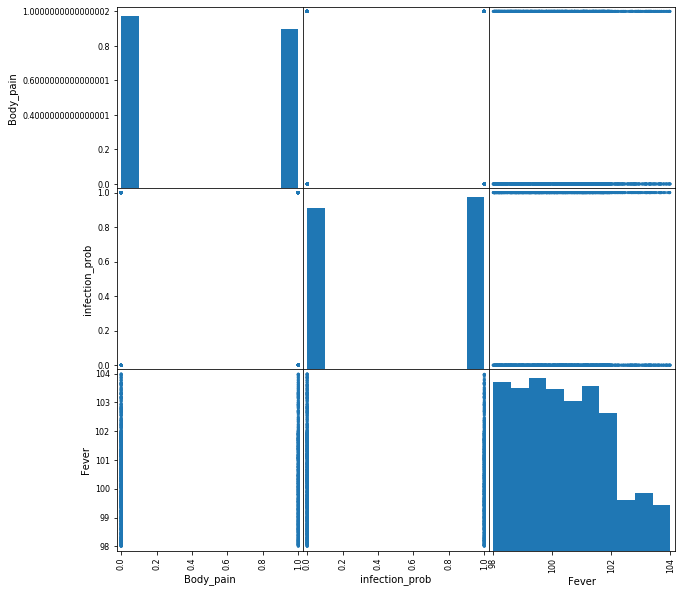

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(data.loc[:,["Body_pain","infection_prob","Fever"]],alpha=0.7,figsize=(10,10))

In [12]:
train=data.sample(frac=0.70,random_state=42)
test=data[~data.index.isin(train.index)]

In [13]:
x_train=train.drop('infection_prob',axis=1)
y_train=train.loc[:,'infection_prob']


In [14]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
std_scl=StandardScaler()
std_scl.fit_transform(x_train)

array([[-0.14347194, -0.968496  , -1.47312177,  1.03252879,  1.24949701],
       [-0.90683683, -0.968496  ,  1.17828884, -0.968496  ,  1.24949701],
       [ 1.01154967,  1.03252879, -0.57784026,  1.03252879, -1.19228944],
       ...,
       [-1.35501447, -0.968496  ,  1.6259296 , -0.968496  ,  0.02860378],
       [ 1.06607573,  1.03252879, -0.0613317 , -0.968496  , -1.19228944],
       [ 0.2701282 ,  1.03252879, -1.30095225, -0.968496  , -1.19228944]])

# Logistic_REGRESSOR

In [15]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver="lbfgs")

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
err=cross_val_score(model,x_train,y_train,scoring="neg_mean_squared_error",cv=5)

In [18]:
err=-err

In [19]:
print(f"mean : {err.mean()} \n std : {err.std()}")

mean : 0.48570605241092346 
 std : 0.010539799276388958


# SVM

In [20]:
from sklearn.svm import SVC
model=SVC(gamma="scale")


In [21]:
err=cross_val_score(model,x_train,y_train,scoring="neg_mean_squared_error",cv=5)

In [22]:
err=-err

In [23]:
print(f"mean : {err.mean()} \n std : {err.std()}")

mean : 0.47599984139812224 
 std : 0.0005748678452571585


# Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(splitter="best",max_depth=4)

In [39]:
err=cross_val_score(model,x_train,y_train,scoring="neg_mean_squared_error",cv=5)
err=-err

In [40]:
print(f"mean : {err.mean()} \n std : {err.std()}")

mean : 0.48344474882010696 
 std : 0.01821977794391841


# Random Forest classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=5,n_jobs=-1)


In [35]:
err=cross_val_score(model,x_train,y_train,scoring="neg_mean_squared_error",cv=5)
err=-err

In [36]:
print(f"mean : {err.mean()} \n std : {err.std()}")

mean : 0.4840161773915355 
 std : 0.01902584127456018


In [41]:
x_test=test.drop('infection_prob',axis=1)
y_test=test['infection_prob']

In [43]:
model.fit(x_train,y_train)
predict=model.predict(x_test)

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
err=mean_squared_error(predict,y_test)

In [47]:
err

0.4786666666666667